# AutoML Example

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from warnings import simplefilter

import kaggler
from kaggler.metrics import auc, mae, rmse, plot_curve
from kaggler.model import AutoLGB, AutoXGB

In [3]:
print(f"matplotlib: {matplotlib.__version__}")
print(f"     numpy: {np.__version__}")
print(f"    pandas: {pd.__version__}")
print(f"   sklearn: {sklearn.__version__}")
print(f"   kaggler: {kaggler.__version__}")

matplotlib: 3.5.1
     numpy: 1.21.5
    pandas: 1.2.4
   sklearn: 0.24.2
   kaggler: 0.9.13


In [4]:
plt.style.use("fivethirtyeight")
simplefilter("ignore")

RANDOM_SEED = 42
N_OBS = 1000
N_FEATURE = 10
N_IMP_FEATURE = 2

## Classification with AutoLGB

In [5]:
X, y = make_classification(
    n_samples=N_OBS,
    n_features=N_FEATURE,
    n_informative=N_IMP_FEATURE,
    random_state=RANDOM_SEED,
)
X = pd.DataFrame(X, columns=["x{}".format(i) for i in range(X.shape[1])])
y = pd.Series(y)
print(f"X dim: {X.shape}, y dim: {y.shape}")

X dim: (1000, 10), y dim: (1000,)


In [6]:
X_trn, X_tst, y_trn, y_tst = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED
)

In [7]:
model = AutoLGB(objective="binary", metric="auc")
model.tune(X_trn, y_trn)
model.fit(X_trn, y_trn)
p = model.predict(X_tst)
print(f"AUC (LGB): {auc(y_tst, p):.4f}")

100%|██████████| 100/100 [00:04<00:00, 21.28trial/s, best loss: -0.95953125]
AUC (LGB): 0.9437


In [8]:
print(f"{len(model.features)} features out of {N_FEATURE} features selected: {model.features}")

10 features out of 10 features selected: ['x6', 'x8', 'x0', 'x2', 'x9', 'x5', 'x3', 'x7', 'x4', 'x1']


In [9]:
model.params

{'bagging_freq': 1,
 'verbosity': -1,
 'seed': 42,
 'num_threads': -1,
 'feature_pre_filter': False,
 'objective': 'binary',
 'metric': 'auc',
 'boosting': 'gbdt',
 'bagging_fraction': 0.9,
 'feature_fraction': 0.9,
 'lambda_l1': 0.1,
 'lambda_l2': 1,
 'learning_rate': 0.11371927176320622,
 'max_depth': -1,
 'min_child_samples': 25,
 'num_leaves': 255}

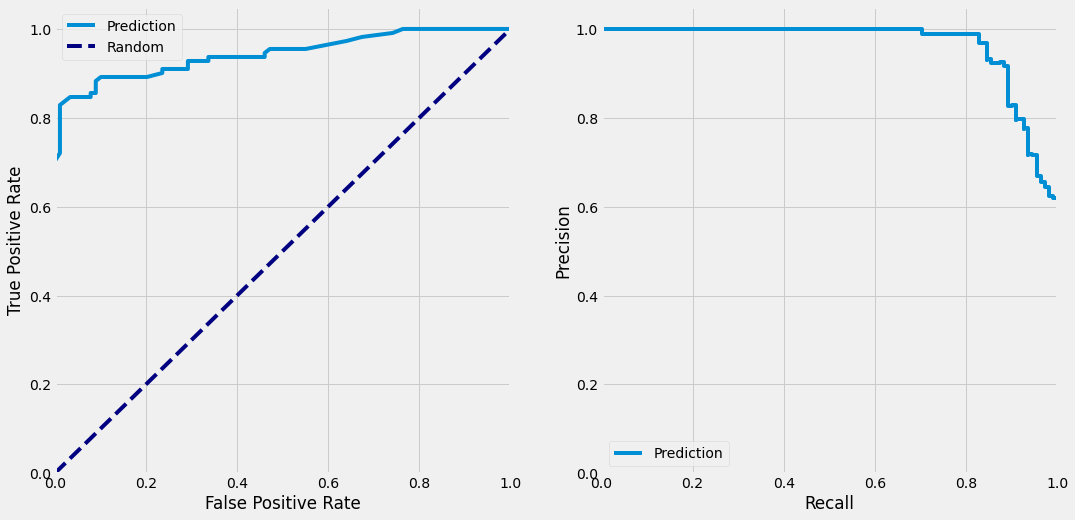

In [10]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_curve(y_tst, p, kind="roc")
plt.subplot(1, 2, 2)
plot_curve(y_tst, p, kind="pr")

## Regression with AutoXGB

In [11]:
X, y = make_regression(
    n_samples=N_OBS,
    n_features=N_FEATURE,
    n_informative=N_IMP_FEATURE,
    random_state=RANDOM_SEED,
)
X = pd.DataFrame(X, columns=["x{}".format(i) for i in range(X.shape[1])])
y = pd.Series(y)
print(f"X dim: {X.shape}, y dim: {y.shape}")

X dim: (1000, 10), y dim: (1000,)


In [12]:
model = AutoXGB(objective="reg:squarederror", metric="rmse")
model.tune(X_trn, y_trn)
model.fit(X_trn, y_trn)
p = model.predict(X_tst)
print(f"RMSE (XGB): {rmse(y_tst, p):.4f}")

100%|██████████| 100/100 [01:44<00:00,  1.04s/trial, best loss: 0.249275]
RMSE (XGB): 0.2955


In [13]:
print(f"{len(model.features)} features out of {N_FEATURE} features selected: {model.features}")

10 features out of 10 features selected: ['x6', 'x2', 'x8', 'x1', 'x9', 'x5', 'x0', 'x4', 'x7', 'x3']


In [14]:
model.params

{'random_state': 42,
 'n_jobs': -1,
 'objective': 'reg:squarederror',
 'booster': 'gbtree',
 'colsample_bytree': 0.7000000000000001,
 'learning_rate': 0.2140971222961297,
 'max_depth': 6,
 'min_child_weight': 10,
 'subsample': 0.7000000000000001}